In [65]:
#import and setup hide from final report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

#formatting hide this from final report
sns.set_theme(
    style="white", 
    palette="colorblind",
    font_scale=2.0);

#Pandas is used to retrieve and manipulate the SQL-retrieved data in csv format 
global_data = pd.read_csv('global_data.csv');
cities_data = pd.read_csv('cities_data.csv');

# Introduction
The theory that gases in our atmosphere contribute to global temperatures was first proposed by Joseph Fourier in 1824 when he realized that solar radiation alone could not result in observed temperatures.[1] John Tyndall and Svante Arrhenius later measured the infrared absorption and emission of various gases and theorized that atmospheric composition of these gasses would result in average temperature changes.[2][3] When radioisotopic analysis became available in the mid-20th century, scientists were able to prove the human-generated carbon (as measured by carbon-14 analysis) was increasing in the atmosphere.[4] By 1959 it was projected that CO2 emissions would rise 25% by the year 2000, which could radically affect global temperatures and climate.[5]

Historical temperature data from various places around the globe exist from as early as the mid-1700s. By analyzing historical records and observing the average temperature over time, temperature change trends can be observed both globally and in localized regions. 

## Methods
The following line chart was created from global and local historical temperature records. The data was retrieved from a database using SQL and then processed using the Pandas Python library. A rolling average with a window of 25 years was calculated using the Numpy library, and then displayed using Matplotlib. Seaborn themes were used to style the graph. Additional statistical analyses were performed using the SciPy stats library.

### Data Sources

### SQL Queries Used
    - Global Query
        - SELECT * FROM global_data

    - City Queries
        - SELECT * FROM city_data
            WHERE country = 'Canada' AND city = 'Victoria';
        - SELECT * FROM city_data
	        WHERE city = 'Prague' OR city = 'Victoria' OR city = 'New York' 
            OR city = 'Wuxi' OR city = 'Sydney' OR city = 'Seol' OR city = 'San Salvador'

### Calculations

#### Rolling average

The panda.DataFrame.rolling() function was used to calculate the rolling averages for global and local annual temperature data. A window of 15 years was selected for aesthic smoothing purposes to demonstrate historical average temperature trends.


In [66]:
#Calculating rolling average
avg_window = 15
global_data['rolling_avg'] = global_data.iloc[:,1].rolling(window=avg_window).mean();
cities_data['rolling_avg'] = cities_data.groupby('city')['avg_temp'].rolling(window=avg_window).mean().reset_index(drop=True);

#### Rate and Correlation Coefficient
The SciPy.stats.lingress() function was used to compare determine rate of temperature change per year (See Plots 1,2, and 3 below). It was also used to compare global and local average temperature data sets and produce the correlation coefficients.

In [79]:
def coeff(city, year=1880):
    g = global_data[(global_data.year >= year) & (global_data.year <= 2013)].avg_temp
    return str(
        scipy.stats.linregress(g, cities_data[(cities_data.year >= year) & (cities_data.city == city)].avg_temp))
   
print("The correlation coefficient between the average Global temperature data and the data of Victoria, BC, Canada, (since 1880) is " + coeff("Victoria") + ". New York City has a coefficient of " + coeff("New York")  + " and Prague, Czech Republic has a coefficient of " + coeff("Prague"));

The correlation coefficient between the average Global temperature data and the data of Victoria, BC, Canada, (since 1880) is LinregressResult(slope=0.9520287399597508, intercept=-0.8220814257488724, rvalue=0.6030265133162294, pvalue=1.257012721943491e-14, stderr=0.1096169691548169). New York City has a coefficient of LinregressResult(slope=1.142459773068615, intercept=0.04546268675240128, rvalue=0.6684083114610122, pvalue=1.1057513366550456e-18, stderr=0.11065348601701744) and Prague, Czech Republic has a coefficient of LinregressResult(slope=0.994957164941526, intercept=-0.1586947912348915, rvalue=0.5589096365873186, pvalue=2.2471082908519074e-12, stderr=0.12848430399782954)


# Observations and Discussion
1. The average global temperature has been increasing since the early 19th century. The overall increase is roughly 0.0047°C per year. 

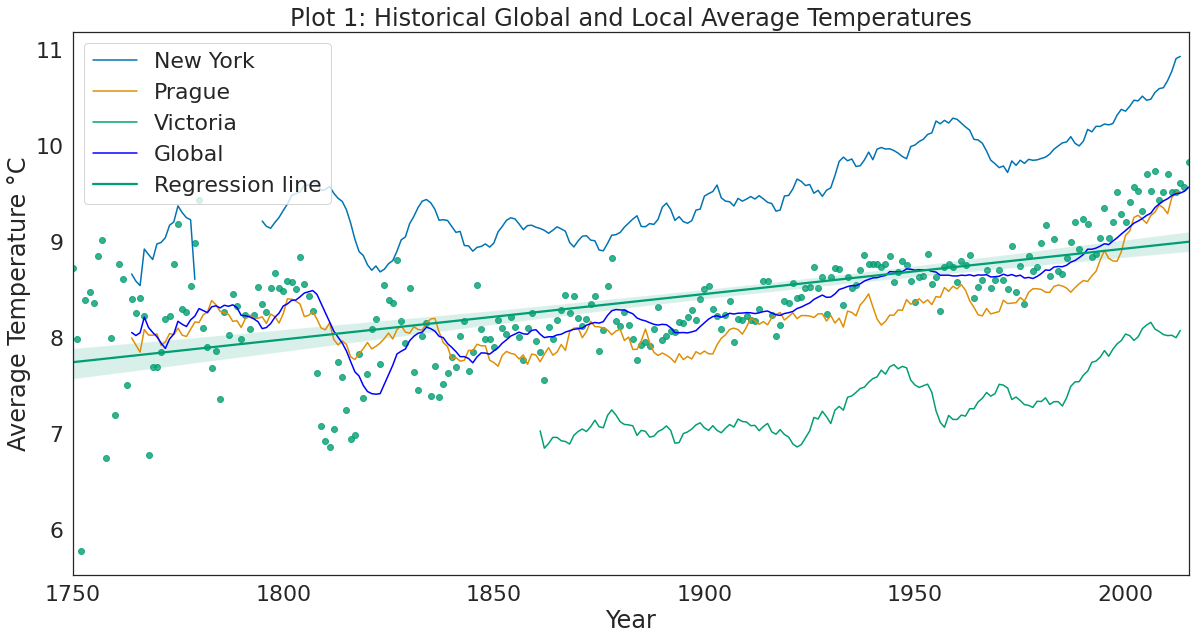

In [124]:
plt.figure(figsize=(20,10));
sns.lineplot(x=cities_data.year, y=cities_data.rolling_avg, hue=cities_data.city);
sns.lineplot(x=global_data.year, y=global_data.rolling_avg, label="Global", color="blue");
ax = sns.regplot(x="year", y="avg_temp", data=global_data, color='g', line_kws={'label':"Regression line"});

plt.title("Plot 1: Historical Global and Local Average Temperatures");
plt.xlabel("Year");
plt.ylabel("Average Temperature °C");
plt.legend(loc="upper left");

In [94]:
joined_table = pd.merge(cities_data, global_data, how="left", on=["year","year"])
joined_table.sort_values(by=['year'])
joined_table['diff'] = joined_table.avg_temp_x - joined_table.avg_temp_y
means = joined_table.groupby('city')['diff'].mean()
print("The average difference between global average temperatures and local average temperatures for New York, Prague, and Victoria, Canada are listed below:")
print(means)

The average difference between global average temperatures and local average temperatures for New York, Prague, and Victoria, Canada are listed below:
city
New York    1.131559
Prague     -0.124470
Victoria   -1.222186
Name: diff, dtype: float64


2. Local city temperature data follows a similar trend to and can be predicted by global temperature averages. The calculated correlation coefficient between the average Global temperature data and the data of Victoria, BC, Canada since 1880 is 0.603. New York City has a coefficient of 0.668 and Prague, Czech Republic has a coefficient of 0.559 for the same time period. These coefficients indicate a strong positive relationship between the global temperature averages and local temperature averages.[8]

On average, the difference in average temperature between global temperatures and loca city temperatures are listed in the table below:

| City  | Temp Difference (°C)|
|:----------|-------------:|
| New York  | 1.13|
| Prague | -0.12|
| Victoria, BC  | -1.22|

In [187]:
glo_1815 = global_data[(global_data.year >= 1810) & (global_data.year <= 1815)]
print(scipy.stats.linregress(glo_1815.year, glo_1815.avg_temp))

glo_post1815 = global_data[(global_data.year > 1815) & (global_data.year <= 1830)]
print(scipy.stats.linregress(glo_post1815.year, glo_post1815.avg_temp))

glo_1930 = global_data[(global_data.year > 1920) & (global_data.year < 1940)]
print(scipy.stats.linregress(glo_1930.year, glo_1930.avg_temp))


glo_1950 = global_data[(global_data.year >= 1940) & (global_data.year <= 1975)]
print(scipy.stats.linregress(glo_1950.year, glo_1950.avg_temp))

glo_1975 = global_data[(global_data.year > 1975)]
print(scipy.stats.linregress(glo_1975.year, glo_1975.avg_temp))



LinregressResult(slope=0.128, intercept=-224.76666666666668, rvalue=0.6615522418359202, pvalue=0.15243625929190796, stderr=0.07254686498428183)
LinregressResult(slope=0.09807142857142856, intercept=-170.81888095238094, rvalue=0.7839469089728885, pvalue=0.0005422770716516337, stderr=0.02154048006725931)
LinregressResult(slope=0.01256140350877192, intercept=-15.665614035087701, rvalue=0.4547503133990411, pvalue=0.050443511574748585, stderr=0.005966678546242253)
LinregressResult(slope=-0.0025572715572715647, intercept=13.666692406692423, rvalue=-0.1830213373980437, pvalue=0.28532648161240615, stderr=0.0023557939988714063)
LinregressResult(slope=0.027613508442776737, intercept=-45.90375609756098, rvalue=0.8843732107630949, pvalue=3.8535561087553624e-14, stderr=0.0023643235415619327)


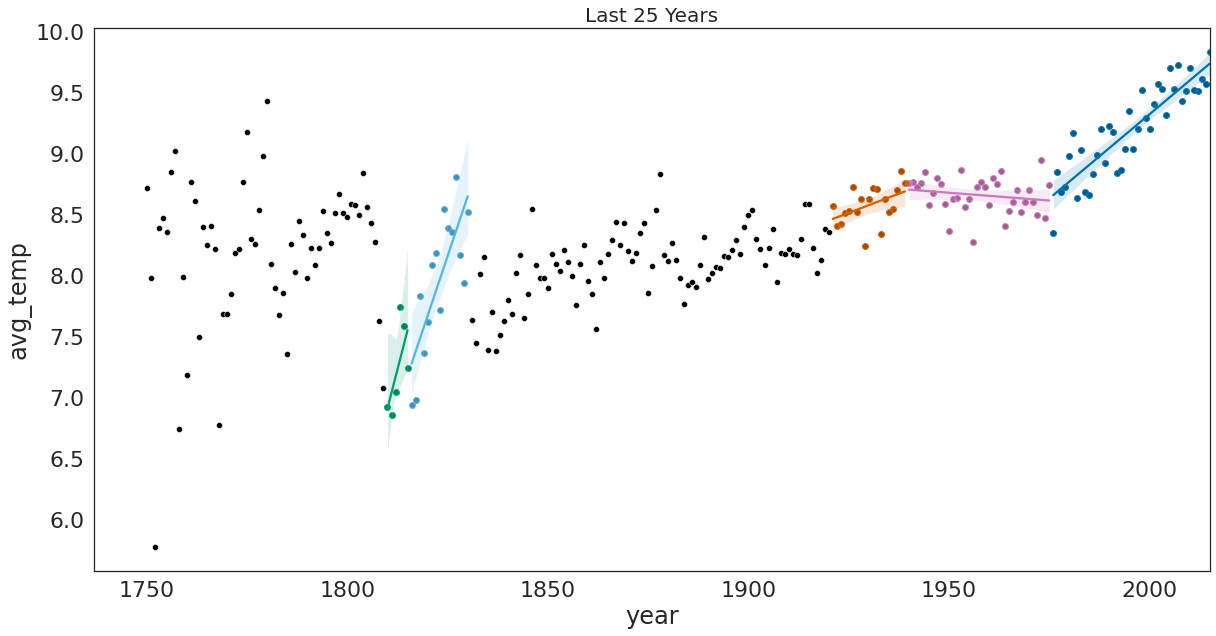

In [189]:
plt.figure(figsize=(20,10))

sns.scatterplot(x="year", y="avg_temp", data=global_data, color='black')
sns.regplot(x="year", y="avg_temp", data=glo_1815, color='g', line_kws={'label':"Regression line"});
sns.regplot(x="year", y="avg_temp", data=glo_post1815, color='c', line_kws={'label':"Regression line"});
sns.regplot(x="year", y="avg_temp", data=glo_1975, color='b', line_kws={'label':"Regression line"});
sns.regplot(x="year", y="avg_temp", data=glo_1950, color='m', line_kws={'label':"Regression line"});
sns.regplot(x="year", y="avg_temp", data=glo_1930, color='r', line_kws={'label':"Regression line"});


plt.title(figure_title, fontsize = 20)

plt.show()

In [190]:
global_data

,year,avg_temp,rolling_avg
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN
5,1755,8.36,NaN
6,1756,8.85,NaN
7,1757,9.02,NaN
8,1758,6.74,NaN
9,1759,7.99,NaN


2. The rate of global temperature increase over the last 25 years is greater than it has been for the rest of the available historical data.

3. While overall the temperature has been increasing since the early century, there have been periods of time when the average temperature levelled off or even slightly decreased. 

    3.1 Global and local temperatures levelled off around the 1950s before continuing to increase in the 1970s into the current period of rapid temperature rises into the present date.

        3.1.1 It has been hypothesized that specific aersols released during World War II may have caused fluctuations or masked the overall trend of global temperatures increasing during the 1950s-1970s. [6]

    3.2 There was a significant decrease in the average global temperature that occured in the early 1800s.

        3.2.1 In 1815, Mount Tambora erupted which caused the average global temperature to decrease by 0.4-0.7 °C. [7]


# Citations
[1] Fourier, J. (1824). "Remarques Generales sur les Temperatures Du Globe Terrestre et des Espaces Planetaires". Annales de Chimie et de Physique (in French). 27: 136–167.

[2] John Tyndall, Heat considered as a Mode of Motion (500 pages; year 1863, 1873)

[3] Held, Isaac M.; Soden, Brian J. (November 2000). "Water Vapor Feedback and Global Warming". Annual Review of Energy and the Environment. 25: 441–475.

[4] Revelle, Roger, and Hans E. Suess (1957). "Carbon Dioxide Exchange between Atmosphere and Ocean and the Question of an Increase of Atmospheric CO2 During the Past Decades." Tellus, 9: 18–27.

[5] Franta, Benjamin. "On its 100th birthday in 1959, Edward Teller warned the oil industry about global warming". The Guardian. Retrieved 11 January 2021.

[6] Booth, B. B. B. , Dunstone, N. J. , Halloran, P. R. , Andrews, T. , & Bellouin, N. (2012). Aerosols implicated as a prime driver of twentieth‐century North Atlantic climate variability. Nature, 484(7393), 228–232. https://doi.org/10.1038/nature10946 [PubMed]

[7] Schurer, Andrew P; Hegerl, Gabriele C; Luterbacher, Jürg; Brönnimann, Stefan; Cowan, Tim; Tett, Simon F B; Zanchettin, Davide; Timmreck, Claudia (September 17, 2019). "Disentangling the causes of the 1816 European year without a summer". Environmental Research Letters. 14

[8] Stephanie Glen. "Correlation Coefficient: Simple Definition, Formula, Easy Steps" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/